# Prior elicitation

What is the meaning of the parameters in the various processes? Let's study the prior distribution of the number of clusters!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pybmix.core.mixing import DirichletProcessMixing, PitmanYorMixing, StickBreakMixing

## Dirichlet Process

Compare how the prior distribution varies for a DP for different values of the 'total_mass' parameter

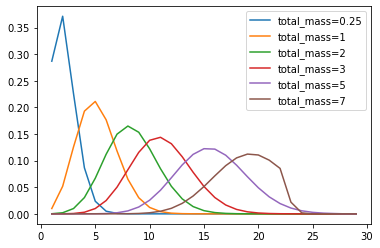

In [2]:
nsamples = 100
grid = np.arange(1, 30)

for total_mass in [0.25, 1, 2, 3, 5, 7]:
    dp = DirichletProcessMixing(total_mass=total_mass)
    probs = dp.prior_cluster_distribution(grid, nsamples)
    plt.plot(grid, probs, label="total_mass={0}".format(total_mass))
    
plt.legend()
plt.show()

## Pitman-Yor Process

The PY process is controlled by two parameters: 'strength' (plays the same role of 'total_mass' in the Dirichlet Process) and 'discount'.
For a fixed value of 'strenght', see how the distribution varies for different values of 'discount'.

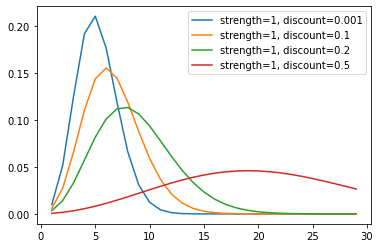

In [3]:
strength = 1
for discount in [0.001, 0.1, 0.2, 0.5]:
    py = PitmanYorMixing(strength=strength, discount=discount)
    probs = py.prior_cluster_distribution(grid, nsamples)
    plt.plot(grid, probs, label="strength={0}, discount={1}".format(strength, discount))
    
plt.legend()
plt.show()

## Stick Breaking prior

### Truncation of a Dirichlet Process

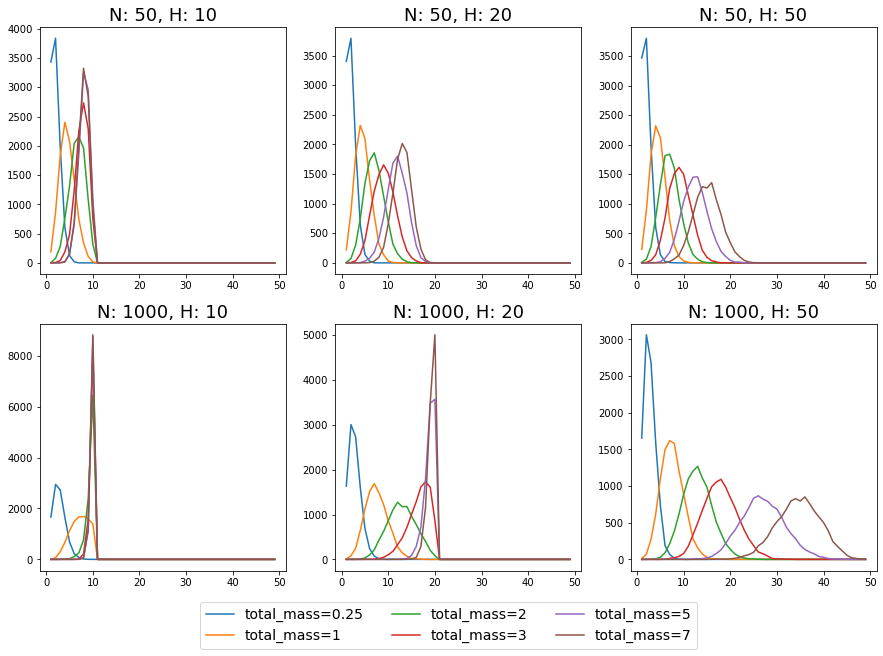

In [5]:
n = [50, 1000]
H = [10, 20, 50]
grid = np.arange(1, 50)

fig, axes = plt.subplots(nrows=len(n), ncols=len(H), figsize=(15, 10))
for i, nval in enumerate(n):
    for j, hval in enumerate(H):
        for total_mass in [0.25, 1, 2, 3, 5, 7]:
            sb = StickBreakMixing(n_comp=hval, strength=total_mass)
            probs = sb.prior_cluster_distribution(grid, nval, mc_iter=10000)
            axes[i][j].plot(grid, probs, label="total_mass={0}".format(total_mass))
            axes[i][j].set_title("N: {0}, H: {1}".format(nval, hval), fontsize=18)

axes[1, 1].legend(ncol=3, fontsize=14, bbox_to_anchor=(1.5, -0.1))
plt.show()

### Truncation of a Pitman-Yor Process

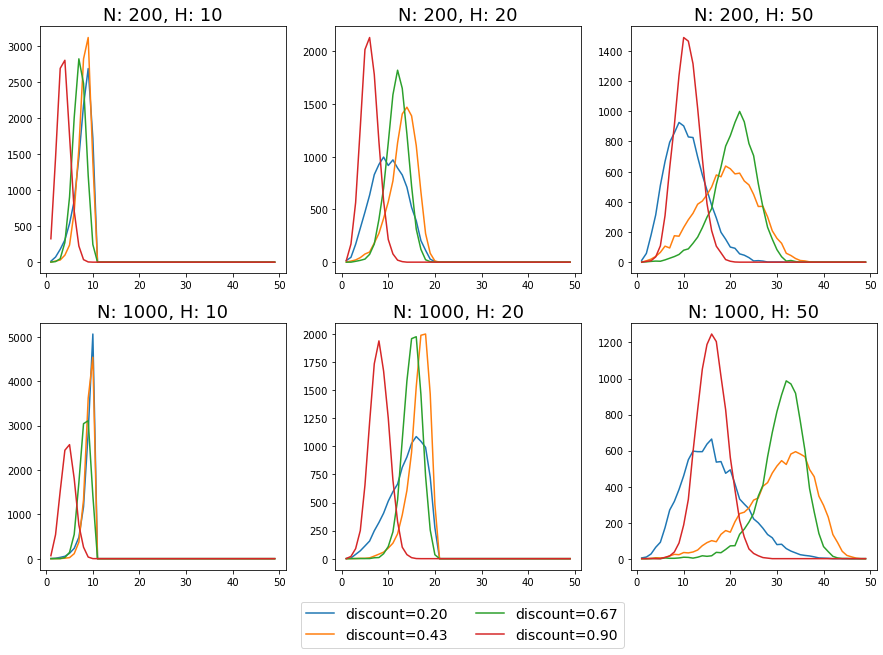

In [6]:
n = [200, 1000]
H = [10, 20, 50]
strength = 1
discount = np.linspace(0.2, 0.9, 4)

fig, axes = plt.subplots(nrows=len(n), ncols=len(H), figsize=(15, 10))

for i, nval in enumerate(n):
    for j, hval in enumerate(H):
        for d in discount:
            sb = StickBreakMixing(n_comp=hval, strength=strength, discount=d)
            probs = sb.prior_cluster_distribution(grid, nval, mc_iter=10000)
            axes[i][j].plot(grid, probs, label="discount={0:.2f}".format(d))
            axes[i][j].set_title("N: {0}, H: {1}".format(nval, hval), fontsize=18)

axes[1, 1].legend(ncol=2, fontsize=14, bbox_to_anchor=(1.2, -0.1))
plt.show()